In [121]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [122]:
#import df5 from .pkl file
df5 = pd.read_pickle('fixed_band_data.pkl')
df5.head()

,Artist,Country/Market,Years Active,Year of First Record,Claimed Sales,Certified Sales,ARG,AUS,AUT,BEL,...,SWE,SWI,UK,US,FIN,GER,MEX,IRE,PHL,NLD
0,ABBA,Sweden,10,1972,200000000,60700000.0,238000.0,6127000.0,175000.0,380000.0,...,800000.0,600000.0,18970000.0,12700000.0,656319.0,10450000.0,260000.0,NaN,NaN,NaN
1,AC/DC,Australia,45,1975,200000000,113600000.0,594000.0,7540000.0,380000.0,100000.0,...,350000.0,894000.0,4400000.0,79700000.0,321169.0,10300000.0,NaN,NaN,NaN,NaN
2,Adele,United Kingdom,12,2008,100000000,104900000.0,NaN,3955000.0,NaN,795000.0,...,240000.0,510000.0,20550000.0,NaN,151639.0,4700000.0,1490000.0,NaN,NaN,NaN
3,Aerosmith,United States,48,1973,150000000,84700000.0,338000.0,225000.0,125000.0,NaN,...,260000.0,145000.0,3230000.0,70250000.0,101722.0,NaN,230000.0,NaN,NaN,NaN
4,Ayumi Hamasaki,Japan,20,1998,80000000,64300000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#make dataframe df6 that contains only the 4 countries with most data
df6 = df5.drop(columns=['Artist', 'Country/Market', 'ARG', 'AUT', 'BEL', 'BRA',
       'CAN', 'DEN', 'ITA', 'JPN', 'NZ', 'POL', 'SPA', 'SWE', 'SWI', 'FIN', 'GER', 'MEX', 'IRE', 'PHL', 'NLD'])
df6.head()

,Years Active,Year of First Record,Claimed Sales,Certified Sales,AUS,FRA,UK,US
0,10,1972,200000000,60700000.0,6127000.0,2750000.0,18970000.0,12700000.0
1,45,1975,200000000,113600000.0,7540000.0,4179999.0,4400000.0,79700000.0
2,12,2008,100000000,104900000.0,3955000.0,NaN,20550000.0,NaN
3,48,1973,150000000,84700000.0,225000.0,225000.0,3230000.0,70250000.0
4,20,1998,80000000,64300000.0,NaN,NaN,NaN,NaN


In [124]:
#delete all NaN values, call it a new dataframe df7
df7 = df6.dropna()
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 88
Data columns (total 8 columns):
Years Active            57 non-null object
Year of First Record    57 non-null object
Claimed Sales           57 non-null object
Certified Sales         57 non-null float64
AUS                     57 non-null float64
FRA                     57 non-null float64
UK                      57 non-null float64
US                      57 non-null float64
dtypes: float64(5), object(3)
memory usage: 4.0+ KB


In [130]:
df7["Year of First Record"]=df7["Year of First Record"].apply(pd.to_numeric)
df7["Claimed Sales"]=df7["Claimed Sales"].apply(pd.to_numeric)
df7["Years Active"]=df7["Years Active"].apply(pd.to_numeric)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

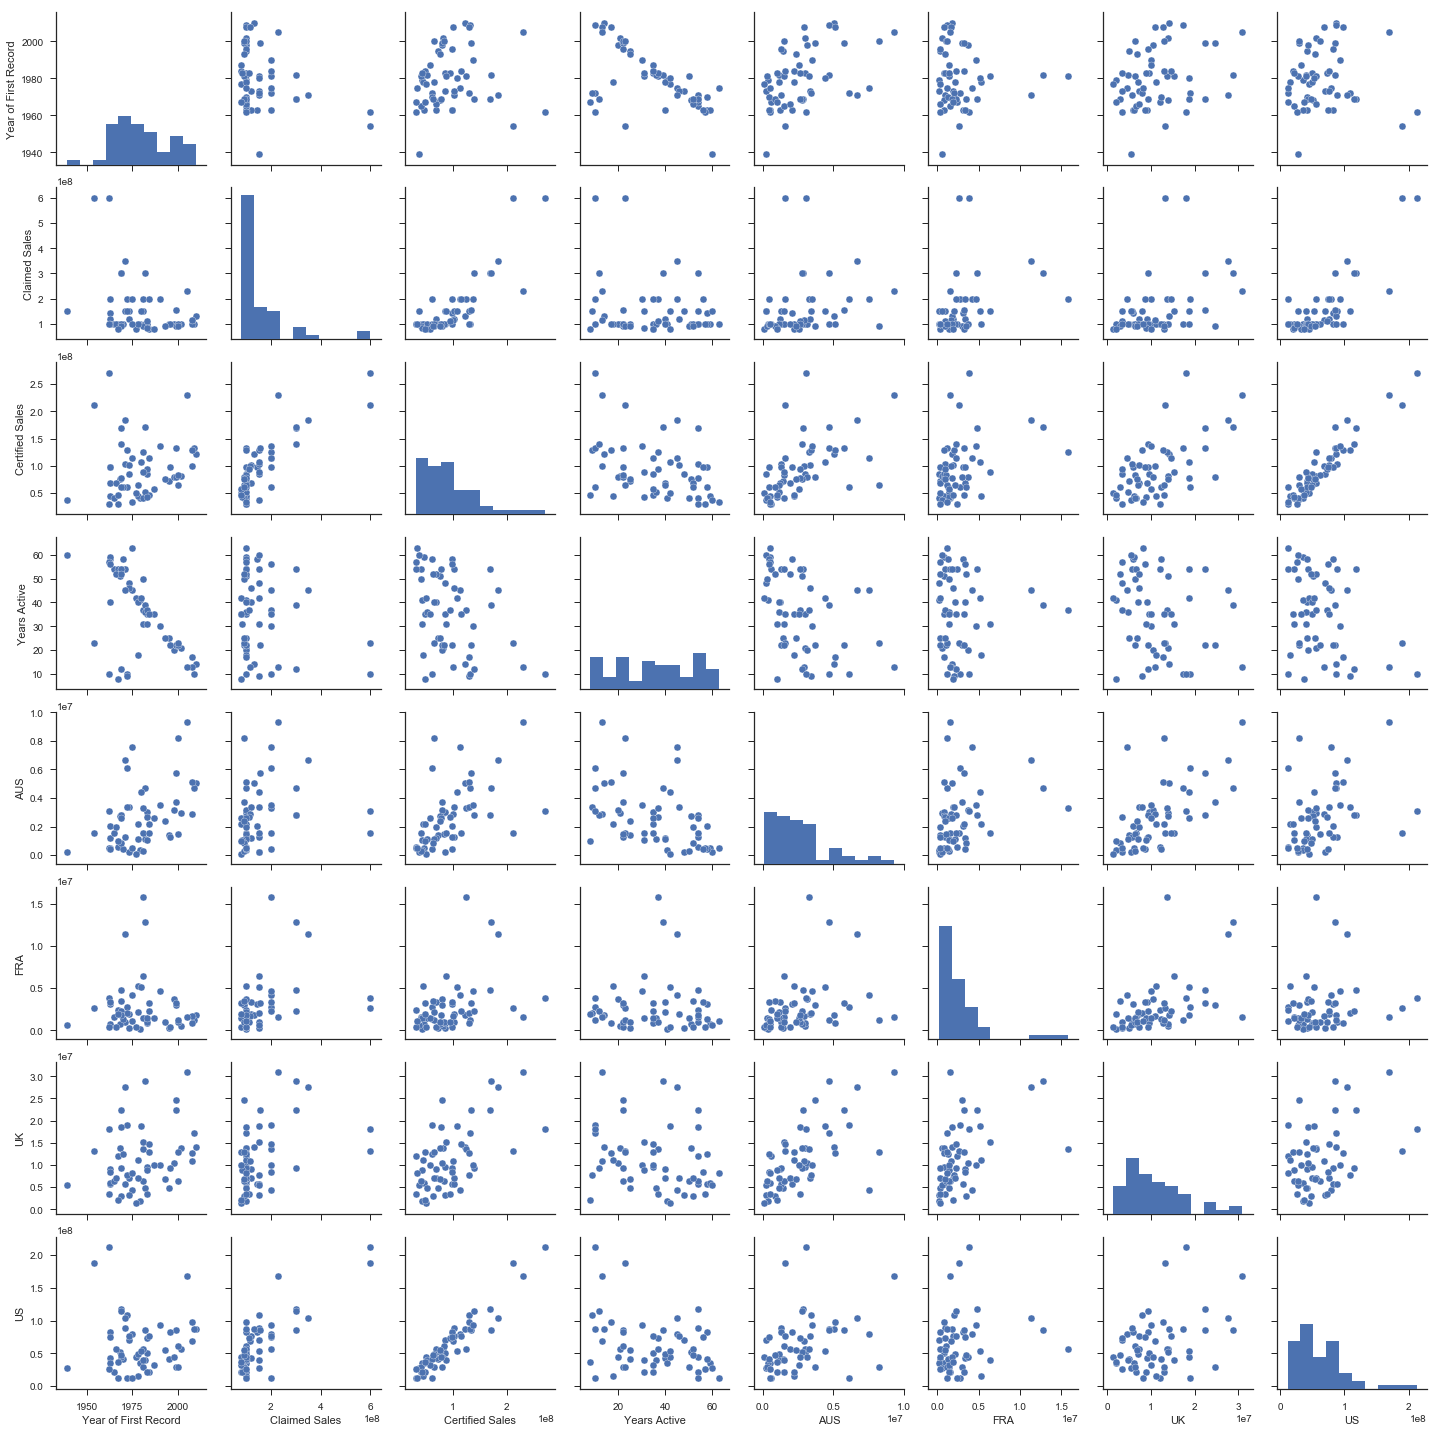

In [131]:
sns.pairplot(data=df7[["Year of First Record","Claimed Sales","Certified Sales","Years Active","AUS","FRA","UK","US"]]);

In [132]:
df7.dtypes

Years Active              int64
Year of First Record      int64
Claimed Sales             int64
Certified Sales         float64
AUS                     float64
FRA                     float64
UK                      float64
US                      float64
dtype: object

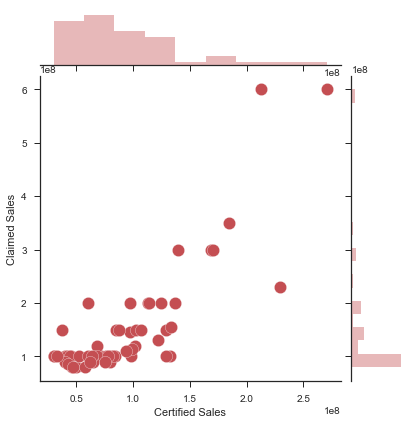

In [150]:
g = sns.JointGrid(x="Certified Sales", y="Claimed Sales", data=df7)
g = g.plot_joint(plt.scatter, color="r", s=150, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="r")

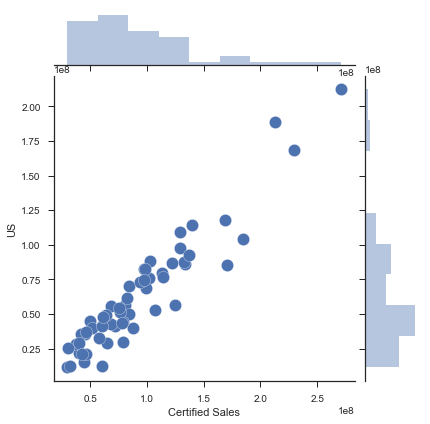

In [148]:
g = sns.JointGrid(x="Certified Sales", y="US", data=df7)
g = g.plot_joint(plt.scatter, color="b", s=150, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="b")

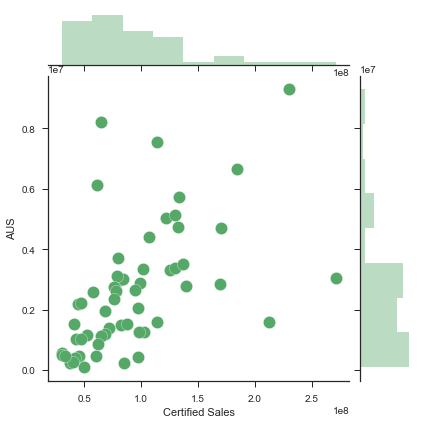

In [147]:
g = sns.JointGrid(x="Certified Sales", y="AUS", data=df7)
g = g.plot_joint(plt.scatter, color="g", s=150, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")